<a href="https://colab.research.google.com/github/ManavGuru/Portfolio/blob/master/CSCE_633.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOMEWORK 1

#DATA EXPLORATION


Number of Benign cases are: 330 
Number of malignant cases are: 153 
No, the two classes are not equally distributed.



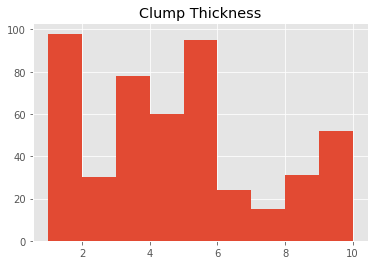

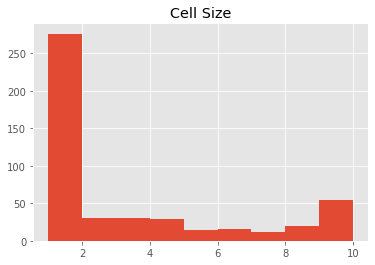

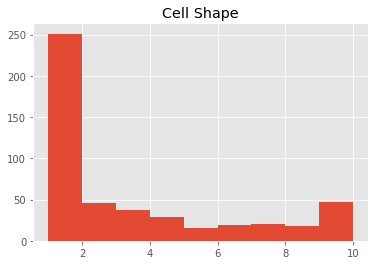

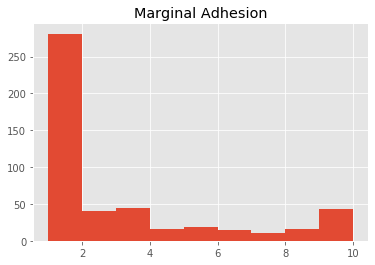

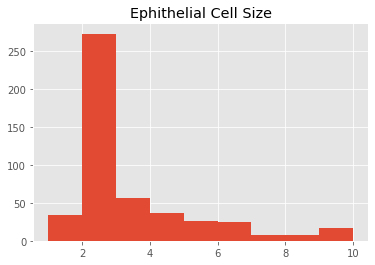

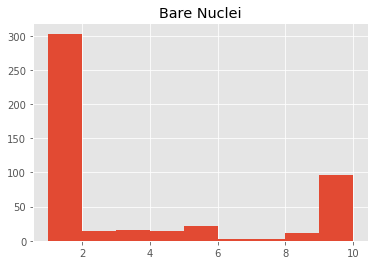

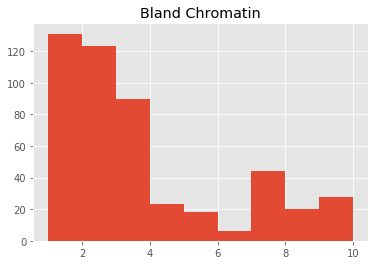

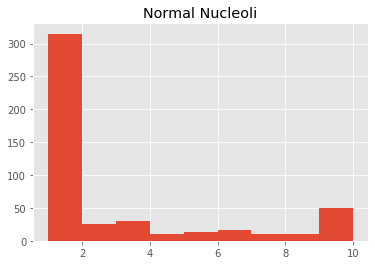

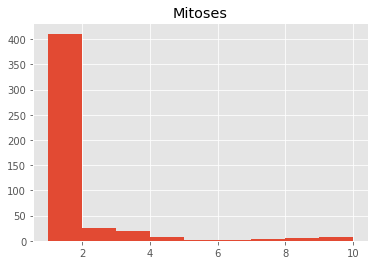

In [0]:
import csv
import matplotlib.pyplot as plt
import numpy as np

malign = 0
benign = 0
Clump_Thick =  []
Cell_Size = []
Cell_Shape =  []
Marg_Adh =  []
E_Cell_Size = []
B_Nuclei =  []
Bland_Chromatin =  []
Norm_Nucleoli =  []
Mitoses =  []
type_cancer =  [] 


with open('hw1_question1_train.csv') as csvfile: 
  readCSV = csv.reader(csvfile)
  for row in readCSV: 
    '''read each value from the row and place it in an appropriate list. 
    these lists contain each individual column of our data. 
    '''
    Clump_Thick.append(int(row[0]))
    Cell_Size.append(int(row [1]))
    Cell_Shape.append(int(row [2]))
    Marg_Adh.append(int(row [3]))
    E_Cell_Size.append(int(row [4]))
    B_Nuclei.append(int(row [5]))
    Bland_Chromatin.append(int(row [6]))
    Norm_Nucleoli.append(int(row [7]))
    Mitoses.append(int(row [8]))
    type_cancer.append(row [9])
    '''
    maintain two variables that hold the number of malignant cases and 
    the number of benign cases
    '''
    if (row [9]== '2'):
      benign = benign + 1
    else: 
      malign = malign + 1
  

print ("Number of Benign cases are:", benign, "\nNumber of malignant cases are:",malign,"\nNo, the two classes are not equally distributed.\n")
plt.style.use('ggplot')
'''
Plotting the histogram of the various features. 
'''
plt.title('Clump Thickness')
plt.hist(np.sort(Clump_Thick),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Cell Size')
plt.hist(np.sort(Cell_Size),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Cell Shape')
plt.hist(np.sort(Cell_Shape),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Marginal Adhesion')
plt.hist(np.sort(Marg_Adh),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Ephithelial Cell Size')
plt.hist(np.sort(E_Cell_Size),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Bare Nuclei')
plt.hist(np.sort(B_Nuclei),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Bland Chromatin')
plt.hist(np.sort(Bland_Chromatin),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Normal Nucleoli')
plt.hist(np.sort(Norm_Nucleoli),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Mitoses')
plt.hist(np.sort(Mitoses),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()





# IMPLEMENTATION USING CLASSES

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import csv
import math as m
import operator

class Datapoint(object):
  
  def __init__ (self, feats):
      self.feature_1 = feats['Clump_Thick']
      self.feature_2 = feats['U_CSize']
      self.feature_3 = feats['CShape']
      self.feature_4 = feats['M_Adh']
      self.feature_5 = feats['E_CSize']
      self.feature_6 = feats['B_Nuclei']
      self.feature_7 = feats['Bl_Chroma']
      self.feature_8 = feats['Norm_Nucleoli']
      self.feature_9 = feats['Mitoses']
      self.type_of_tumor = feats['type_of_tumor']
  
  def feature_vector (self):
      return np.array([self.feature_1, self.feature_2, self.feature_3,\
                       self.feature_4, self.feature_5, self.feature_6,\
                       self.feature_7, self.feature_8, self.feature_9, self.type_of_tumor])
  def __str__(self):
    return "\nClump Thickness:{}, \nCell Size:{}, \nCell Shape:{}, \nMarginal Adhesion:{},\
     \nEpithelial Cell Size:{}, \nBare Nuclei:{}, \nBland Chromatin:{}, \
     \nNormal Nucleoli:{}, \nMitoses:{}, \nType of Tumor:{}".format(self.feature_1, self.feature_2, self.feature_3, self.feature_4, self.feature_5,\
                                                                  self.feature_6, self.feature_7, self.feature_8,  self.feature_9, self.type_of_tumor)
  
def parse_dataset(filename):
    with open(filename) as csvfile: 
      dataset = []
      readCSV = csv.reader(csvfile)
      for row in readCSV: 
        a=Datapoint({'Clump_Thick':int(row[0]), 'U_CSize':int(row[1]), 'CShape':int(row[2]), 'M_Adh':int(row[3]), \
                                  'E_CSize':int(row[4]), 'B_Nuclei':int(row[5]), 'Bl_Chroma':int(row[6]), 'Norm_Nucleoli':int(row[7]),
                                  'Mitoses':int(row[8]),'type_of_tumor':int(row[9])})
        
        dataset.append(a.feature_vector())
    
    
    return dataset

dataset_train = parse_dataset('hw1_question1_train.csv')
dataset_test  = parse_dataset('hw1_question2_test.csv')
dataset_dev = parse_dataset('hw1_question2_dev.csv')

print("Total Number of Data Points in Training set: {0}".format(len(dataset_train)))
print("Total Number of Data Points in Dev set: {0}".format(len(dataset_dev)))
print("Total Number of Data Points in Testing set: {0}".format(len(dataset_test)))


def plot_data(dataset,x,y): 
  
  benign_feat1 = [data[x] for data in dataset if data[9] == 2]
  benign_feat2 = [data[y] for data in dataset if data[9] == 2]
  malign_feat1 = [data[x] for data in dataset if data[9] == 4]
  malign_feat2 = [data[y] for data in dataset if data[9] == 4]
  plt.scatter(benign_feat1,benign_feat2, c='b',marker ='x', label = 'Benign')
  plt.scatter(malign_feat1,malign_feat2, c='r',marker ='o', label = 'Malignant')
  plt.legend()
  plt.show()

plot_data(dataset_train, 6, 4)
plot_data(dataset_train, 0, 2)
plot_data(dataset_train, 1, 3)
plot_data(dataset_train, 3, 5)
plot_data(dataset_train, 4, 2)

print("The Datapoints are not linearly sperable.")

#-------------------------------------------------------------CLASSIFICATION----------------------------------------------------------------------------------------------------
''' 
As a first step in classification, I define a function that can compute the eucledian distance between two datapoints
'''
def EuclidDistance (instance1, instance2, length): 
  distance = 0 
  for x in range(length):
    distance += pow((instance1[x]-instance2[x]),2)
  return m.sqrt(distance)

def cosSimilarity(instance1, instance2, length):
  cosSimilarity = cosine_similarity(instance1, instance2)
  return (cosSimilarity)
 

# Function to compute the neighbors to the test point. 
def getNeighbors(dataset, testcase, k):
  distances = []
  length = len(testcase) - 1
  for x in range((len(dataset))):
    dist = EuclidDistance(testcase,dataset[x],length)
    distances.append((dataset[x],dist))
  distances.sort(key=operator.itemgetter(1))
  neighbors = []
  for x in range (k):
      neighbors.append(distances[x][0])
  return neighbors 

def getResponse(neighbors):
    votes = []
    four = 0
    two = 0
    for x in range (len(neighbors)):
      response = neighbors [x][-1]
      votes.append(neighbors[x][-1])
    for x in votes: 
      if x == 2: 
        two += 1
      else: 
        four += 1
    if (two>four):
      result = 2 
    else: 
      result = 4
    return (result)
    
def Acc (classified,dataset): 
  count = 0
  for x in range (len(dataset)): 
    if (classified[x]==dataset[x][-1]):
      count += 1
  acc = float(count/(len(dataset)))
  return(acc)

def bAcc (classified,dataset): 
  one = 0
  two = 0
  count1 = 0
  count2 = 0
  for x in range (len(dataset)): 
    if (dataset[x][-1]== 2):
      one += 1 
    else: 
      two += 1
  
  for x in range (len(dataset)): 
    if (classified[x]==dataset[x][-1] & classified [x]==2):
      count1 += 1
    elif (classified[x]==dataset[x][-1] & classified [x]==4):
      count2 += 1
  bacc = 0.5*((count1/one) + (count2/two)) 
  return(bacc)

k_values = [1,3,5,7,9,11,13,15,17,19]
acc_values = []
bacc_values = []
for k in k_values: 
  neighbors = []
  classified = []
  print("\nRunning for K =", k)
  for data in dataset_test:
    neighbors= (getNeighbors(dataset_train, data, k))
    classified.append(getResponse (neighbors))
  print('Accuracy:',Acc(classified,dataset_test),'\nBalanced Accuracy:',bAcc(classified,dataset_test))
  acc_values.append(Acc(classified, dataset_test))
  bacc_values.append(bAcc(classified,dataset_test))
plt.title('Accuracy')
plt.bar(k_values,acc_values)
plt.show()

plt.title('Balanced Accuracy')
plt.bar(k_values,bacc_values)
plt.show()

print('Best K1 is', acc_values.index(max(acc_values))+2)
print('Best K2 is', bacc_values.index(max(bacc_values))+2)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
def cosSimilarity(instance1, instance2, length):
  i1 = instance1.reshape(1,length)
  i2 = instance2.reshape(1,length)
  cos_sim = cosine_similarity(instance1, instance2)
  return (cos_sim)

print(cosSimilarity(dataset_dev[0],dataset_dev[0],10))

ValueError: ignored